In [1]:
from ml import *

# Logistic function

Since we are not interested in values below $0$ or above $1$, we can use a function that caps all outcomes between 0 and 1. Additionally, since we are trying to find a maximum likelihood $P( y = 1| x )$, we would rather use a function that is related to likelihood estimation. One function that meets these requirements is the logistic function: 

$$ logit(z) = \frac{e^z}{1 + e^z} = \frac{1}{1+e^{-z}} $$

The logistic function can be derived from the odds-ratio $O$. The odds-ratio is defined as the fraction between the likelihood of an event occurring and the likelihood of an event not occurring. Thus, the likelihood $P$ and odds-ratio $O$ are related as follows:

$$ O = \frac{P}{1-P}, P = \frac{O}{1+O} $$

To apply the logistic function to a linear regression model $\theta^T \cdot x$, we simply transform the output of a linear regression hypothesis with the logistic function. This transformation means that we are not estimating a value for $y$, but rather the likelihood that $y = 1$:

$$ P(y = 1|x; \theta) = logit( \theta^T \cdot x ) = \frac{1}{1+e^{-\theta^T \cdot x}} $$

The consequence of this transformation is that the model then tries to fit $\theta$ such that:

$$ e^{\theta^T \cdot x} = \frac{P}{1-P} = Odds-ratio $$

# Analyzing the Logistic function

The logistic function is shown in the graph below, and we observe that indeed the outcomes are constrained between $0$ and $1$. We interpret the outcome as $y=1$ when $P(y=1|z) \ge 0$, and $y=0$ otherwise. Thus, the decision boundary between predicting 0 and 1 will be at $z=0$; to maximize our prediction, for $z < 0$ we will predict $y=0$ and for $z \ge 0$ we will predict $y=1$.

We will finally summarize a few interesting properties of using the logistic function for classification:

- It is a non-linear function that pushes the outcomes towards respectively 0 and 1. We will see that, regardless, the decision boundary will be linear unless we use higher order polynomials. 
- By constraining the upper bound to 1, the model becomes ignorant to the difference between fair, good and excellent wines beacuse they all receive predictions close to 1. This means that model is less affected by outliers than least squares linear regression is.

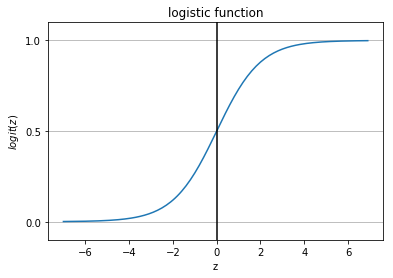

In [2]:
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)

plt.plot(z, logistic(z))
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$logit(z)$')
plt.title('logistic function')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)